#  The Sparks Foundation DSE Internship

### Author : Lakshay Kapur

### Task3 : Exploratory Data Analysis - Retail

In [1]:
# type your code here
#Importing required libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import plotly
import plotly.express as px

In [2]:
# Main Dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
# Shape of dataset
df.shape

(9994, 13)

In [5]:
#Dtype info and usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Summary stats for the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#Finding missing values 
df.isnull().sum()/df.shape[0] *100

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [8]:
# columns division
num_col = df.select_dtypes(exclude='object').columns
cat_col = df.select_dtypes(include='object').columns

print('numerical columns:') #consists of int dtype var
print(num_col)
print()
print('categorical columns:') #consists if obj dtype var
print(cat_col)

numerical columns:
Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

categorical columns:
Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')


In [9]:
print(df.value_counts()) #value counts for categorical columns

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit  
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370     2
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288     2
                                            San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780     2
                Corporate    United States  Seattle        Washington  98105        West     Office Supplies  Paper         19.440   3         0.0        9.3312     2
                Home Office  United States  Columbus       Ohio        43229        East     Furniture        Chairs        281.372  2         0.3       -12.0588    2
   

In [10]:
#Finding total duplicates in the dataset
df.duplicated().sum()

17

In [11]:
#Dropping duplicates
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
#Finding unique values in each columns
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [13]:
#Finding correlation for every numerical column w.r.t Profit
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [14]:
#Finding covariance
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [15]:
#Dropping columns postal code since it is giving least correlation with Profit column
df1=df.drop(columns=['Postal Code'],axis=1)

Generate pair plots for the following variables: 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'

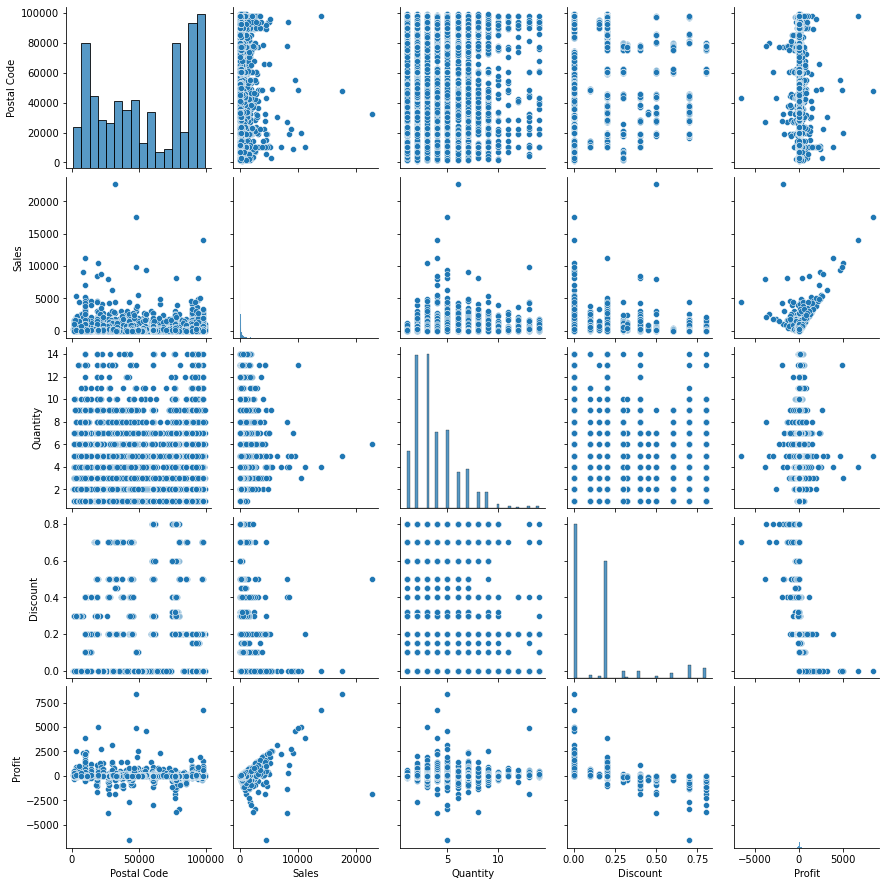

In [16]:
df_pp = df[['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']]
sns.pairplot(df_pp)

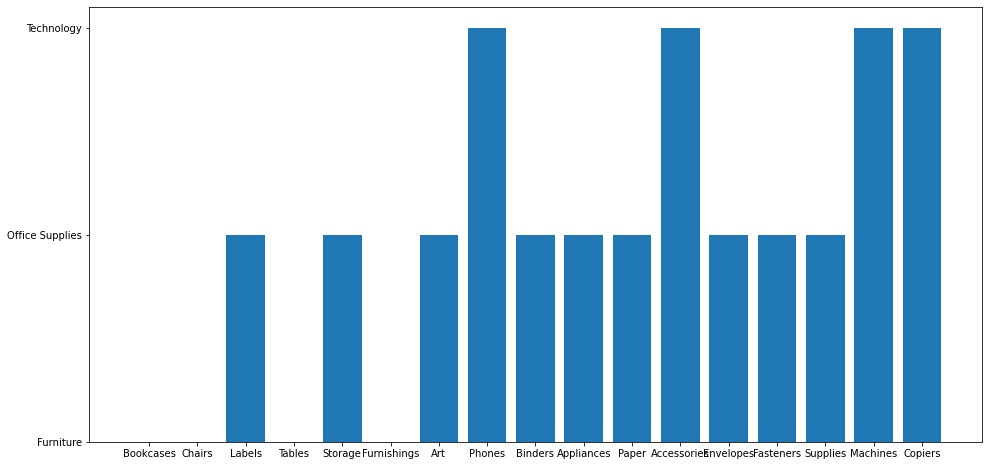

In [17]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df) #Plotting categorical columns for description
plt.show()

In [18]:
cat_col

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

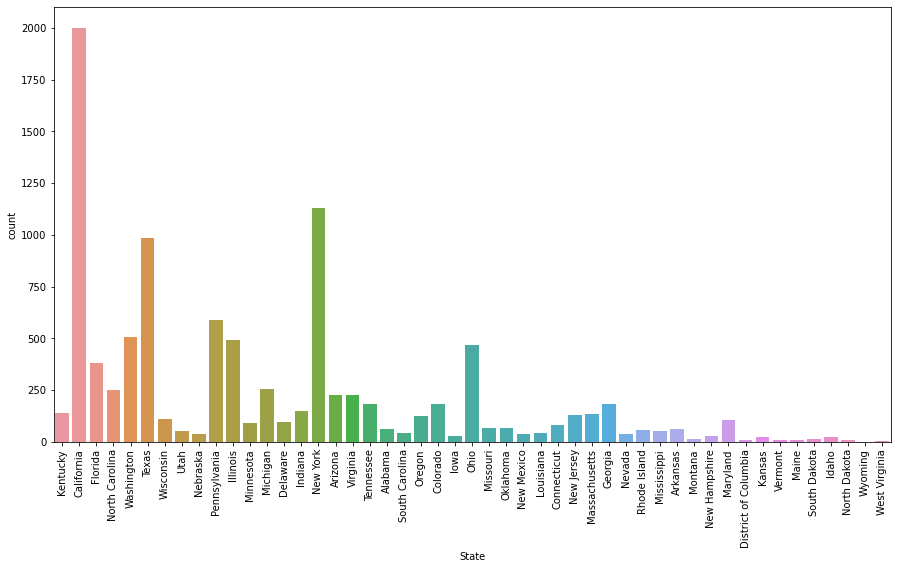

In [19]:
print(df1['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df1['State'])
plt.xticks(rotation=90)
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


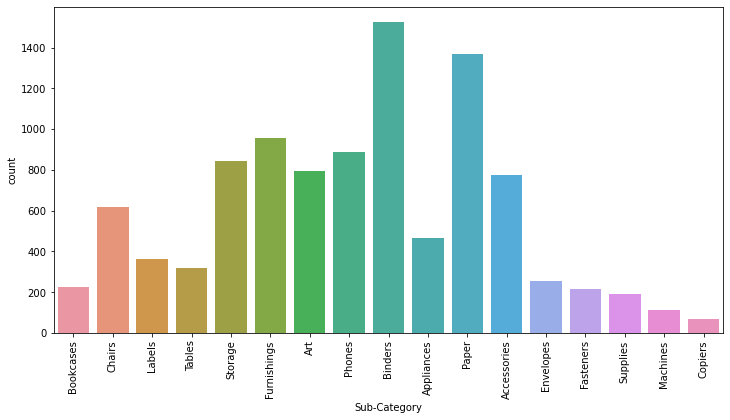

In [20]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

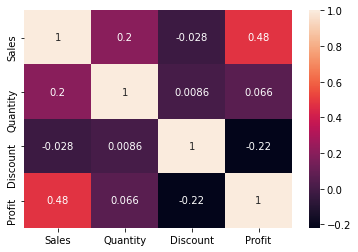

In [21]:
#Heatmap for correlation visualisation
sns.heatmap(df1.corr(), annot= True)
plt.show()

Visualisation for categorical columns

<AxesSubplot:xlabel='Segment', ylabel='count'>

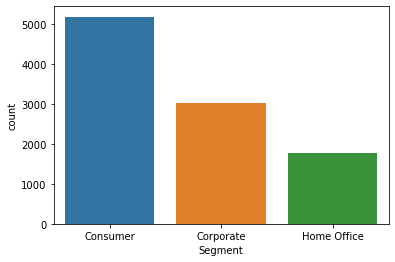

In [22]:
sns.countplot(x=df['Segment'])

<AxesSubplot:xlabel='Region', ylabel='count'>

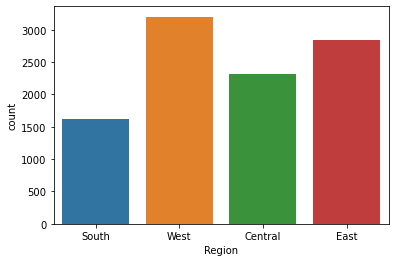

In [23]:
sns.countplot(x=df['Region'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

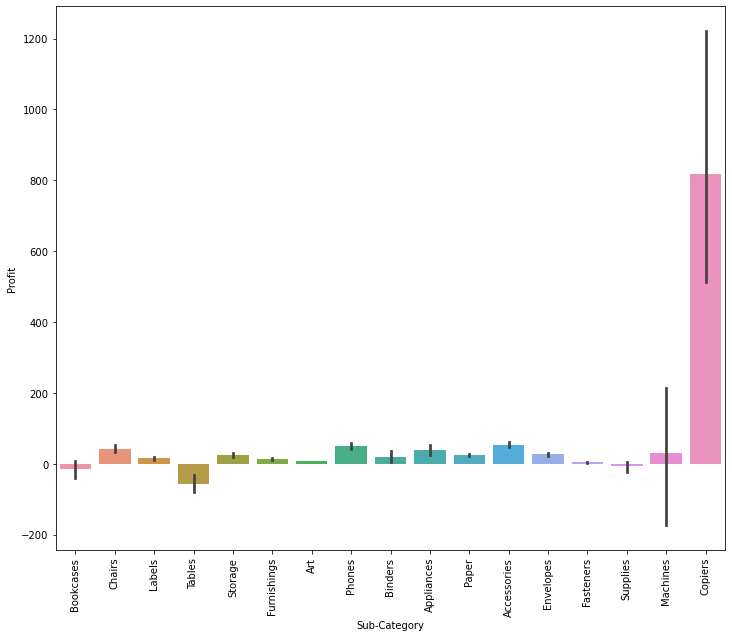

In [25]:
plt.figure(figsize=(12,10))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])
plt.xticks(rotation=90)

Visualisation for Numerical columns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


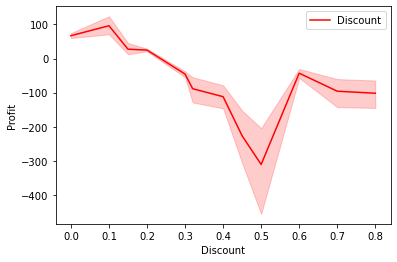

In [52]:
sns.lineplot('Discount', 'Profit', data = df, color = 'r', label= 'Discount')
plt.show()

In [26]:
df1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

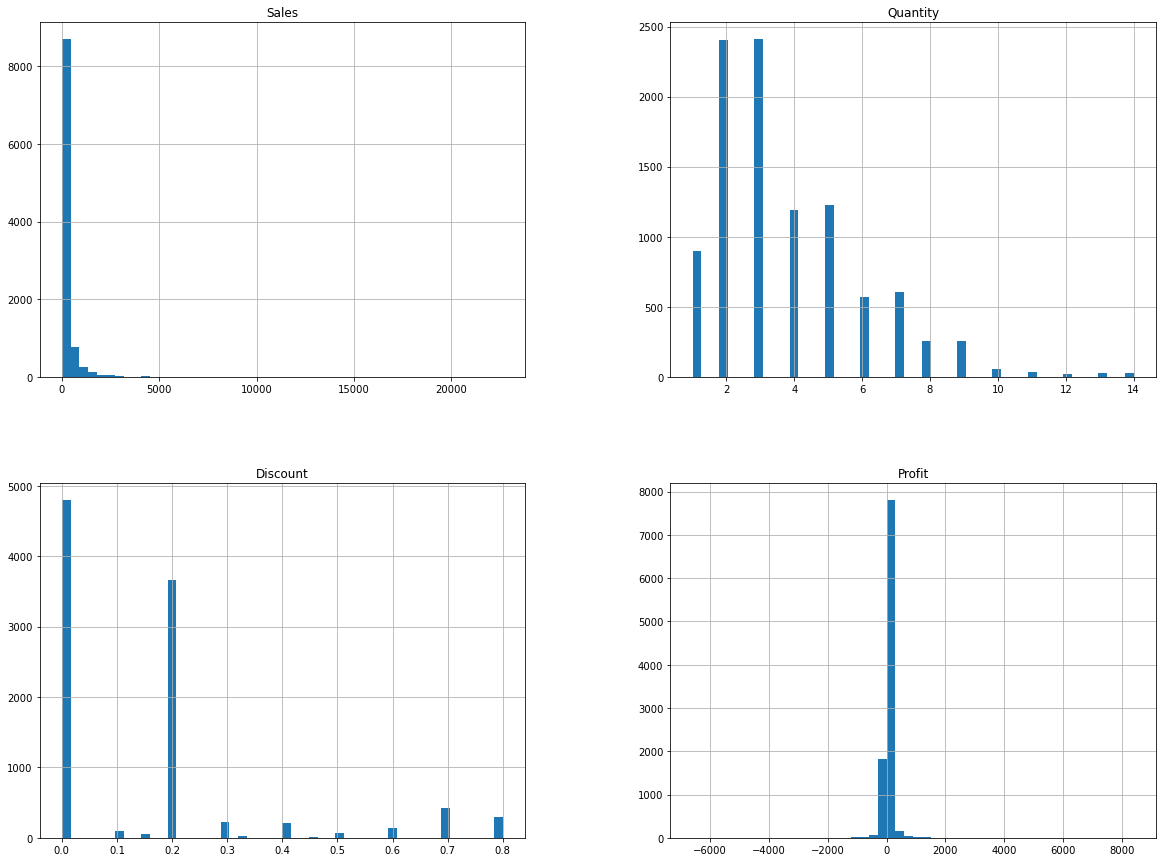

In [27]:
df1.hist(bins=50 ,figsize=(20,15)) #histogram for df1
#Sales, quantity and discount are nearly right skewed

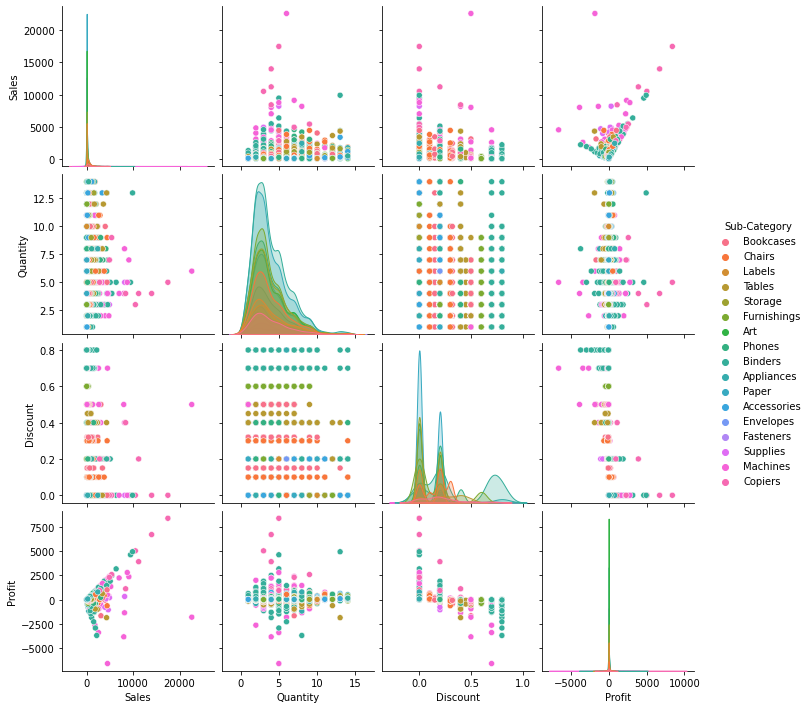

In [28]:
sns.pairplot(df1,hue='Sub-Category')

In [29]:
Q1 = df1['Profit'].quantile(0.25)
Q2 = df1['Profit'].quantile(0.5)
Q3 = df1['Profit'].quantile(0.75)

In [30]:
IQR = Q3 - Q1 #inter quantile range for outliers
IQR

27.63525

In [32]:
#Printing by omitting the outliers
df1[(df1['Profit'] < Q1 - 1.5 * IQR) | (df1['Profit'] > Q3 + 1.5 * IQR)]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092
13,Standard Class,Consumer,United States,Seattle,Washington,West,Office Supplies,Binders,407.9760,3,0.20,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...
9957,Standard Class,Home Office,United States,New Rochelle,New York,East,Office Supplies,Paper,223.9200,4,0.00,109.7208
9962,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9968,Standard Class,Consumer,United States,Plainfield,New Jersey,East,Office Supplies,Binders,735.9800,2,0.00,331.1910
9979,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Binders,437.4720,14,0.20,153.1152


In [34]:
#Number of observations that are outliers
len(df1[(df1['Profit'] < Q1 - 1.5 * IQR) | (df1['Profit'] > Q3 + 1.5 * IQR)])

1881

In [35]:
#Number of observations that are not outliers
df3 = df1[(df1['Profit'] > Q1 - 1.5 * IQR) & (df1['Profit'] < Q3 + 1.5 * IQR)]
len(df3)

8113

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


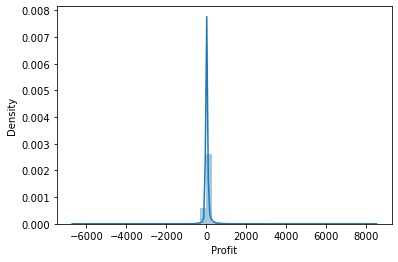

In [36]:
#Visualisation of Profit with outliers
sns.distplot(df1['Profit'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


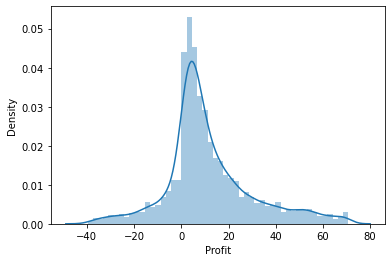

In [37]:
#Visualisation of Profit column wihtout outliers
sns.distplot(df3['Profit'])
plt.show()

In [38]:
#Skewness
print('Skewness of Original Profit',df1['Profit'].skew())
print('Skewness of IQR Cleaned Profit',df3['Profit'].skew())

Skewness of Original Profit 7.561431562468343
Skewness of IQR Cleaned Profit 0.7656685073433558


In [39]:
#Kurtosis
print('Kurtosis of Original Profit',df1['Profit'].kurt())
print('Kurtosis of IQR Cleaned Profit',df3['Profit'].kurt())

Kurtosis of Original Profit 397.1885145524141
Kurtosis of IQR Cleaned Profit 1.228686439821573


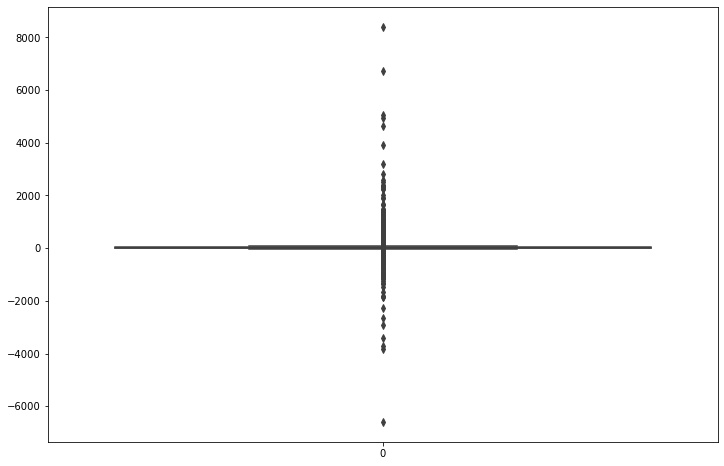

In [40]:
#Boxplot with outliers
plt.figure(figsize=(12,8))
sns.boxplot(data = df1['Profit'])
plt.show()

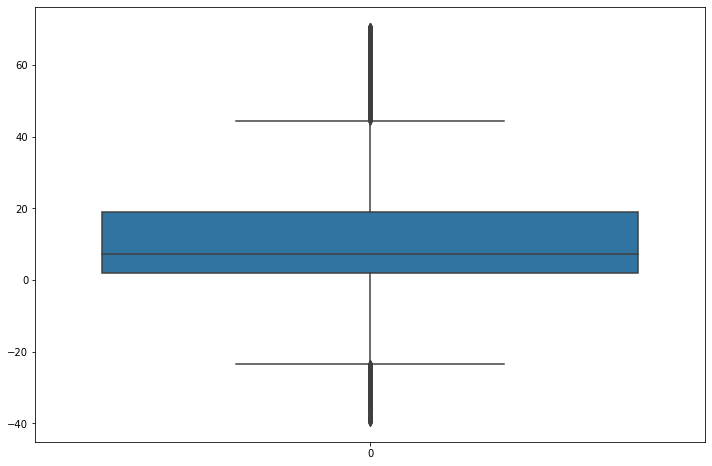

In [42]:
#Boxplot after removing outliers
plt.figure(figsize=(12,8))
sns.boxplot(data = df3['Profit'])
plt.show()

# The End